Part II : Feature Extraction Data

In [298]:
import pandas as pd
import string
import collections
import nltk

In [299]:
df = pd.read_csv('ramen_rating_2023_clean.csv')
df

,Brand,Variety,Style,Country,Stars,T
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN
...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN


In [300]:
variety = df['Variety']
variety

0                     XXL Bihun Segera Penang White Curry
1                    Mi Instan Mi Keriting Goreng Spesial
2       Oriental Kitchen Dried Instant Noodles Truffle...
3                    Jin Jjajang Smoked Black Bean Flavor
4                                           Samyand Ramen
                              ...                        
4627    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
4628                       Oriental Style Instant Noodles
4629                                       Tom Yum Shrimp
4630                                 Tom Yum Chili Flavor
4631                                           Miso Ramen
Name: Variety, Length: 4632, dtype: object

In [301]:
variety_text = " ".join(variety)
variety_text

'XXL Bihun Segera Penang White Curry Mi Instan Mi Keriting Goreng Spesial Oriental Kitchen Dried Instant Noodles Truffle Flavour Jin Jjajang Smoked Black Bean Flavor Samyand Ramen XXL Bihun Segera Sup Ayam Cup Star Batman Garlic Shrimp Aji Corn Bihun Hot & Spicy Fried Bihun 3 Flavors In 1 Noodle – Rice Noodle Cup Taiwan Ramen Seafood Jjamppong Ramyeon Men Shokunin Koidashi Niboshi Shoyu UFO Pokkmyeon Koi Koi Kankoku Fu Amakara Carbo Wonton Men Donburi Butaman Chuka Soba Hot & Sour Pork Bone Ramen Surfmama Goose Oil Zhajiang Noodle Budae Ramyun Shiromaru Classic Ramen Meteor Noodles With Hot & Sour Sauce Jiwa Pagi Mi Instan Ayam Bawang 3 Flavors In 1 Noodle – Guanmiao Locabodeli Coco Ichibanya Kanshu Curry Ramen Toushitsu Off Bowl Noodles Savory Chicken Flavor Corn Bihun Original Fried Bihun Large Sauce Yakisoba Tangle Bulgogi Alfredo Tangluccine Buldak Basil & Cream Udon Vegetarian Noodles Cup Noodles Creamy Tom Yam Flavour Ramen Noodle Soup Birria Flavor Menudo Instant Ramen Noodle Mr

In [302]:
#chuyển về đồng dạng chữ nhỏ
variety_text_lower = variety_text.lower()
variety_text_lower

'xxl bihun segera penang white curry mi instan mi keriting goreng spesial oriental kitchen dried instant noodles truffle flavour jin jjajang smoked black bean flavor samyand ramen xxl bihun segera sup ayam cup star batman garlic shrimp aji corn bihun hot & spicy fried bihun 3 flavors in 1 noodle – rice noodle cup taiwan ramen seafood jjamppong ramyeon men shokunin koidashi niboshi shoyu ufo pokkmyeon koi koi kankoku fu amakara carbo wonton men donburi butaman chuka soba hot & sour pork bone ramen surfmama goose oil zhajiang noodle budae ramyun shiromaru classic ramen meteor noodles with hot & sour sauce jiwa pagi mi instan ayam bawang 3 flavors in 1 noodle – guanmiao locabodeli coco ichibanya kanshu curry ramen toushitsu off bowl noodles savory chicken flavor corn bihun original fried bihun large sauce yakisoba tangle bulgogi alfredo tangluccine buldak basil & cream udon vegetarian noodles cup noodles creamy tom yam flavour ramen noodle soup birria flavor menudo instant ramen noodle mr

In [303]:
#show string trên thấy có những ký tự, cần loại bỏ
punctuation_list = list(string.punctuation)
punctuation_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [304]:
variety_lower_clean = "".join([char for char in variety_text_lower if char not in punctuation_list])
variety_lower_clean

'xxl bihun segera penang white curry mi instan mi keriting goreng spesial oriental kitchen dried instant noodles truffle flavour jin jjajang smoked black bean flavor samyand ramen xxl bihun segera sup ayam cup star batman garlic shrimp aji corn bihun hot  spicy fried bihun 3 flavors in 1 noodle – rice noodle cup taiwan ramen seafood jjamppong ramyeon men shokunin koidashi niboshi shoyu ufo pokkmyeon koi koi kankoku fu amakara carbo wonton men donburi butaman chuka soba hot  sour pork bone ramen surfmama goose oil zhajiang noodle budae ramyun shiromaru classic ramen meteor noodles with hot  sour sauce jiwa pagi mi instan ayam bawang 3 flavors in 1 noodle – guanmiao locabodeli coco ichibanya kanshu curry ramen toushitsu off bowl noodles savory chicken flavor corn bihun original fried bihun large sauce yakisoba tangle bulgogi alfredo tangluccine buldak basil  cream udon vegetarian noodles cup noodles creamy tom yam flavour ramen noodle soup birria flavor menudo instant ramen noodle mr noo

In [305]:
variety_token = nltk.tokenize.word_tokenize(variety_lower_clean)
variety_token

['xxl',
 'bihun',
 'segera',
 'penang',
 'white',
 'curry',
 'mi',
 'instan',
 'mi',
 'keriting',
 'goreng',
 'spesial',
 'oriental',
 'kitchen',
 'dried',
 'instant',
 'noodles',
 'truffle',
 'flavour',
 'jin',
 'jjajang',
 'smoked',
 'black',
 'bean',
 'flavor',
 'samyand',
 'ramen',
 'xxl',
 'bihun',
 'segera',
 'sup',
 'ayam',
 'cup',
 'star',
 'batman',
 'garlic',
 'shrimp',
 'aji',
 'corn',
 'bihun',
 'hot',
 'spicy',
 'fried',
 'bihun',
 '3',
 'flavors',
 'in',
 '1',
 'noodle',
 '–',
 'rice',
 'noodle',
 'cup',
 'taiwan',
 'ramen',
 'seafood',
 'jjamppong',
 'ramyeon',
 'men',
 'shokunin',
 'koidashi',
 'niboshi',
 'shoyu',
 'ufo',
 'pokkmyeon',
 'koi',
 'koi',
 'kankoku',
 'fu',
 'amakara',
 'carbo',
 'wonton',
 'men',
 'donburi',
 'butaman',
 'chuka',
 'soba',
 'hot',
 'sour',
 'pork',
 'bone',
 'ramen',
 'surfmama',
 'goose',
 'oil',
 'zhajiang',
 'noodle',
 'budae',
 'ramyun',
 'shiromaru',
 'classic',
 'ramen',
 'meteor',
 'noodles',
 'with',
 'hot',
 'sour',
 'sauce',
 'ji

In [306]:
#đếm tần suất xuất hiện của các từ có trong cột variety
variety_counters = collections.Counter(variety_token)
variety_counters

Counter({'noodles': 1047,
         'noodle': 976,
         'ramen': 897,
         'flavor': 657,
         'instant': 637,
         'flavour': 580,
         'chicken': 533,
         'spicy': 532,
         'soup': 427,
         'beef': 359,
         'cup': 294,
         'with': 289,
         'sauce': 278,
         'hot': 246,
         'curry': 224,
         'rice': 217,
         'artificial': 181,
         'shrimp': 177,
         'mi': 172,
         'tom': 169,
         'seafood': 163,
         'bowl': 162,
         'tonkotsu': 161,
         'pork': 160,
         'style': 159,
         'udon': 152,
         'yakisoba': 138,
         'miso': 122,
         'yum': 120,
         'goreng': 116,
         'sesame': 114,
         'shoyu': 110,
         'vermicelli': 103,
         'soy': 94,
         'vegetable': 84,
         'kimchi': 84,
         'sour': 83,
         'chili': 77,
         'soba': 75,
         'black': 74,
         'japanese': 74,
         'oriental': 73,
         'oil': 73,
   

In [307]:
variety_counters.most_common()

[('noodles', 1047),
 ('noodle', 976),
 ('ramen', 897),
 ('flavor', 657),
 ('instant', 637),
 ('flavour', 580),
 ('chicken', 533),
 ('spicy', 532),
 ('soup', 427),
 ('beef', 359),
 ('cup', 294),
 ('with', 289),
 ('sauce', 278),
 ('hot', 246),
 ('curry', 224),
 ('rice', 217),
 ('artificial', 181),
 ('shrimp', 177),
 ('mi', 172),
 ('tom', 169),
 ('seafood', 163),
 ('bowl', 162),
 ('tonkotsu', 161),
 ('pork', 160),
 ('style', 159),
 ('udon', 152),
 ('yakisoba', 138),
 ('miso', 122),
 ('yum', 120),
 ('goreng', 116),
 ('sesame', 114),
 ('shoyu', 110),
 ('vermicelli', 103),
 ('soy', 94),
 ('vegetable', 84),
 ('kimchi', 84),
 ('sour', 83),
 ('chili', 77),
 ('soba', 75),
 ('black', 74),
 ('japanese', 74),
 ('oriental', 73),
 ('oil', 73),
 ('penang', 72),
 ('demae', 72),
 ('fried', 70),
 ('pepper', 70),
 ('shio', 70),
 ('big', 69),
 ('vegetarian', 68),
 ('mushroom', 65),
 ('rasa', 63),
 ('garlic', 62),
 ('sabor', 60),
 ('thai', 60),
 ('korean', 60),
 ('original', 58),
 ('ramyun', 57),
 ('tomato'

In [308]:
#tạo thêm cột vị cay với các từ khóa trong tên loại mì như "spicy", "curry", "hot", "tom", "chilli", "chili", "kari", "pedas", "laksa"
is_spicy = []

spicy_flavor = ["spicy", "curry", "hot", "tom", "chilli", "chili", "kari", "pedas", "laksa", "sriracha", "pepper", "sichuan", "habanero", "kimchi", "mala", "picante", "kung", "szechuan", "ghost", "peppery"]
for variety in df["Variety"].str.lower():
    if any(flavor in variety for flavor in spicy_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)

df["IsSpicy"] = is_spicy
df

,Brand,Variety,Style,Country,Stars,T,IsSpicy
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN,1
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN,0
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN,0
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN,0
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN,0
...,...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,0
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,1
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,1


In [309]:
#tạo thêm cột vị gà với từ khóa trong tên loại mì như "chicken", "ayam" (indonesia)
has_chicken = []

chicken_flavor = ["artificial", "chicken", "ayam", "pollo", "gallina"]
for variety in df["Variety"].str.lower():
    if any(flavor in variety for flavor in chicken_flavor):
        has_chicken.append(1)
    else:
        has_chicken.append(0)

df["HasChicken"] = has_chicken
df

,Brand,Variety,Style,Country,Stars,T,IsSpicy,HasChicken
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN,1,0
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN,0,0
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN,0,0
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN,0,0
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN,0,0
...,...,...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,0
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,0,0
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,1,0
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,1,0


In [310]:
#tạo thêm cột vị bò với từ khóa trong tên loại mì như "beef", "cow" 
has_beef = []

beef_flavor = ["beef", "cow", "meat", "steak", "rib", "barbecue", "brisket","sirloin","tenderloin", "ribeye", "shank"]
for variety in df["Variety"].str.lower():
    if any(flavor in variety for flavor in beef_flavor):
        has_beef.append(1)
    else:
        has_beef.append(0)

df["HasBeef"] = has_beef
df

,Brand,Variety,Style,Country,Stars,T,IsSpicy,HasChicken,HasBeef
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN,1,0,0
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN,0,0,0
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN,0,0,0
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN,0,0,0
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,0,0
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,0,0,0
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,1,0,0
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,1,0,0


In [311]:
#tạo thêm cột vị hải sản với từ khóa trong tên loại mì như "seafood", "fish", "crab", "shrimp", "prawn"
has_seafoods = []

seafoods_flavor = ["seafood", "fish", "crab", "shrimp", "prawn", "tom", "lobster", "scallop", "clam", "abalone", "oyster", "squid", "seaweed", "sushi", "ebi", "caviar"]
for variety in df["Variety"].str.lower():
    if any(flavor in variety for flavor in seafoods_flavor):
        has_seafoods.append(1)
    else:
        has_seafoods.append(0)

df["HasSeafoods"] = has_seafoods
df

,Brand,Variety,Style,Country,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN,1,0,0,0
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN,0,0,0,0
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN,0,0,0,0
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN,0,0,0,0
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,0,0,0
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,0,0,0,0
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,1,0,0,1
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,1,0,0,1


Data Exploration

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

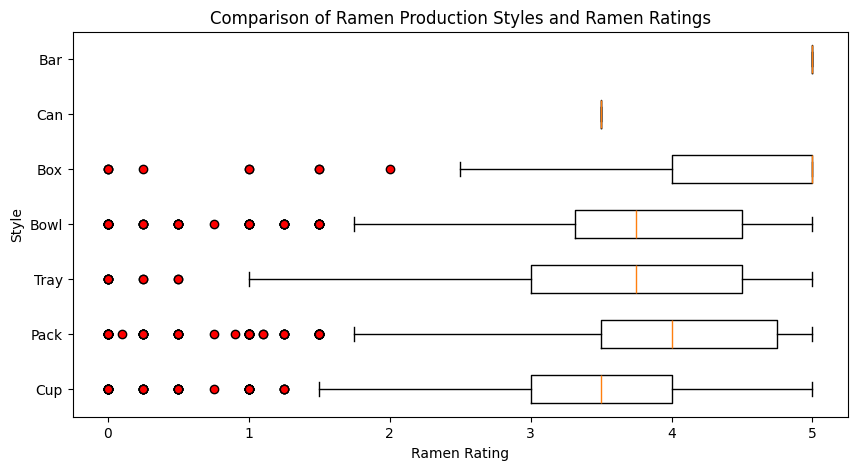

In [313]:
#so sánh các kiểu sản xuất mì ramen và rating của chúng
plt.figure(figsize=(10,5))
labels = ['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar']

Cup = df.loc[df['Style'] == 'Cup']['Stars']
Pack = df.loc[df['Style'] == 'Pack']['Stars']
Tray = df.loc[df['Style'] == 'Tray']['Stars']
Bowl = df.loc[df['Style'] == 'Bowl']['Stars']
Box = df.loc[df['Style'] == 'Box']['Stars']
Can = df.loc[df['Style'] == 'Can']['Stars']
Bar = df.loc[df['Style'] == 'Bar']['Stars']

outliers = dict(markerfacecolor='r', marker='o')
plt.title('Comparison of Ramen Production Styles and Ramen Ratings')
plt.ylabel('Style')
plt.xlabel('Ramen Rating')

plt.boxplot([Cup, Pack, Tray, Bowl, Box, Can, Bar], labels=labels, vert=False, flierprops=outliers)
plt.grid(False)
plt.show()


In [314]:
#explore brand
brand_counts = df['Brand'].value_counts()
brand_counts

Brand
Nissin           566
Maruchan         182
Myojo            152
Nongshim         136
Samyang Foods    121
                ... 
Kiseki Foods       1
Hua Feng           1
Hi-Lai Foods       1
Xiuhe              1
Westbrae           1
Name: count, Length: 695, dtype: int64

<BarContainer object of 695 artists>

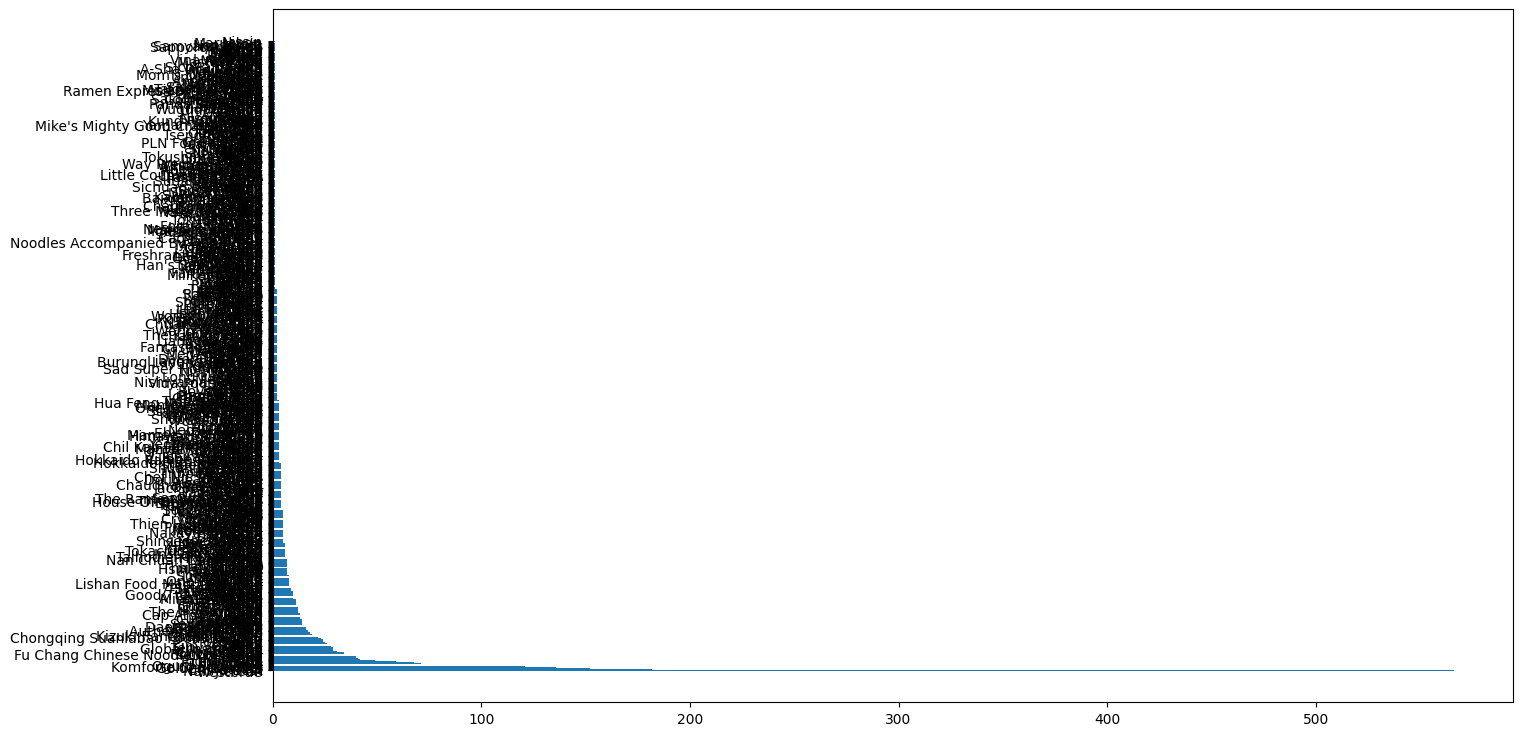

In [315]:
#plot a barplot for brand count
plt.figure(figsize=(16,9))
plt.barh(brand_counts.sort_values(ascending=True).index, 
         brand_counts.sort_values(ascending=False))
#plt.xticks(rotation=90)

In [316]:
#explore Styles
style_count = df['Style'].value_counts()
style_count

Style
Pack          2471
Bowl           926
Cup            908
Tray           207
Box            113
Restaurant       3
Boowl            1
Bottle           1
Can              1
Bar              1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pack'),
  Text(1, 0, 'Bowl'),
  Text(2, 0, 'Cup'),
  Text(3, 0, 'Tray'),
  Text(4, 0, 'Box'),
  Text(5, 0, 'Restaurant'),
  Text(6, 0, 'Boowl'),
  Text(7, 0, 'Bottle'),
  Text(8, 0, 'Can'),
  Text(9, 0, 'Bar')])

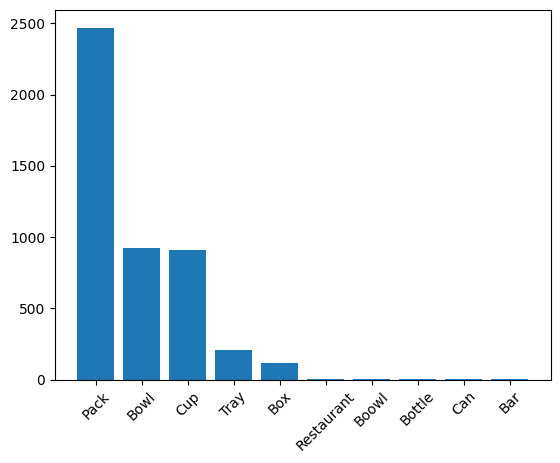

In [317]:
plt.bar(style_count.index, style_count)
plt.xticks(rotation=45)

In [318]:
#explore Country

country_count = df['Country'].value_counts()
country_count

Country
Japan            949
United States    714
South Korea      461
Taiwan           446
China            333
Malaysia         252
Thailand         241
Hong Kong        209
Indonesia        195
Singapore        154
Vietnam          138
UK                83
Canada            56
Philippines       56
India             48
Germany           38
Brazil            32
Mexico            32
Australia         26
Netherlands       16
Bangladesh        15
Pakistan          15
Myanmar           14
Nepal             14
Hungary            9
Russia             7
Colombia           6
Poland             6
France             6
Sarawak            5
Serbia             5
Cambodia           5
Italy              4
Peru               4
Holland            4
Ireland            4
Fiji               4
Spain              3
Israel             3
Finland            3
Sweden             3
Ukraine            3
Dubai              3
Ghana              2
Nigeria            2
Estonia            2
New Zealand        1
Portu

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'Japan'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Malaysia'),
  Text(6, 0, 'Thailand'),
  Text(7, 0, 'Hong Kong'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Vietnam'),
  Text(11, 0, 'UK'),
  Text(12, 0, 'Canada'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'India'),
  Text(15, 0, 'Germany'),
  Text(16, 0, 'Brazil'),
  Text(17, 0, 'Mexico'),
  Text(18, 0, 'Australia'),
  Text(19, 0, 'Netherlands'),
  Text(20, 0, 'Bangladesh'),
  Text(21, 0, 'Pakistan'),
  Text(22, 0, 'Myanmar'),
  Text(23, 0, 'Nepal'),
  Text(24, 0, 'Hungary'),
  Text(25, 0, 'Russia'),
  Text(26, 0, 'Colombia'),
  Text(27, 0, 

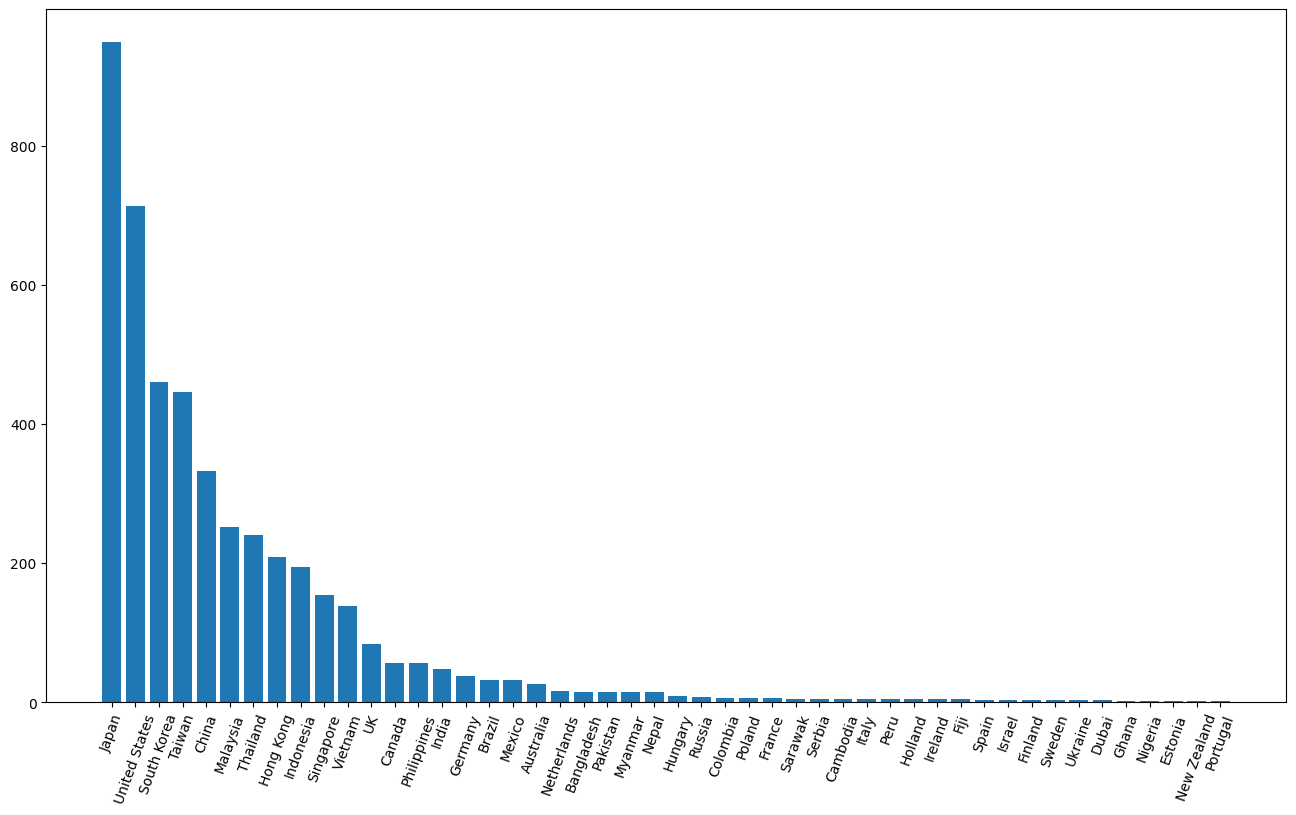

In [319]:
plt.figure(figsize=(16,9))
plt.bar(country_count.index, country_count)
plt.xticks(rotation=70)

(array([  86.,   30.,   73.,  100.,  160.,  246.,  463., 1324.,  784.,
        1366.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

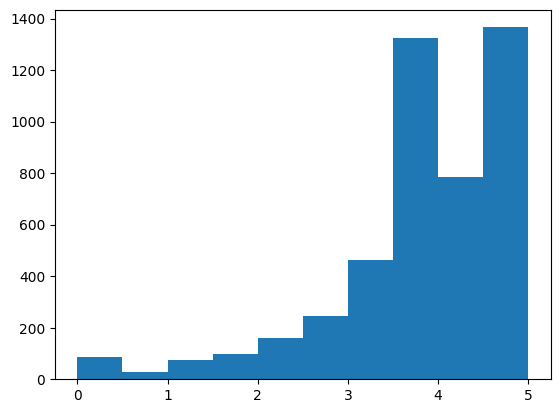

In [320]:
#explore Stars Column
plt.hist(df['Stars'])

In [321]:
df['Stars'].median()

3.75

<Axes: xlabel='IsSpicy', ylabel='count'>

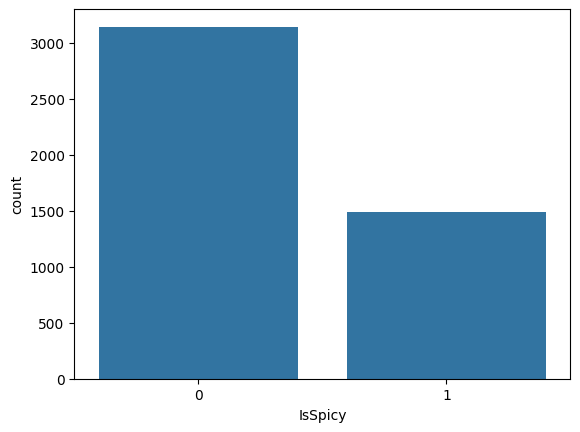

In [322]:
sns.countplot(x='IsSpicy', data=df)

<Axes: xlabel='HasChicken', ylabel='count'>

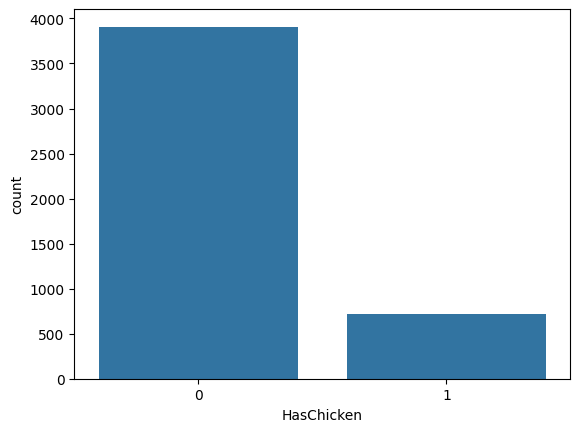

In [323]:
sns.countplot(x='HasChicken', data=df)

<Axes: xlabel='HasBeef', ylabel='count'>

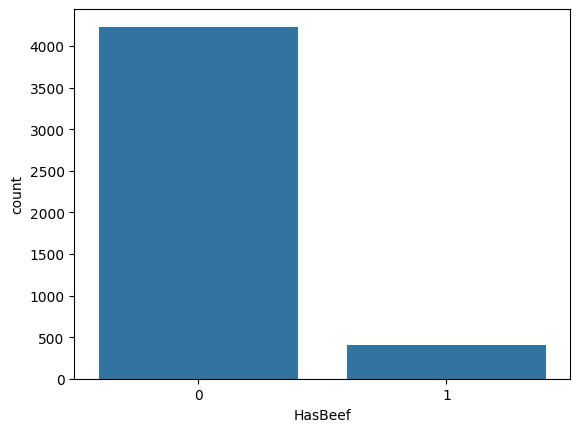

In [324]:
sns.countplot(x='HasBeef', data=df)

<Axes: xlabel='HasSeafoods', ylabel='count'>

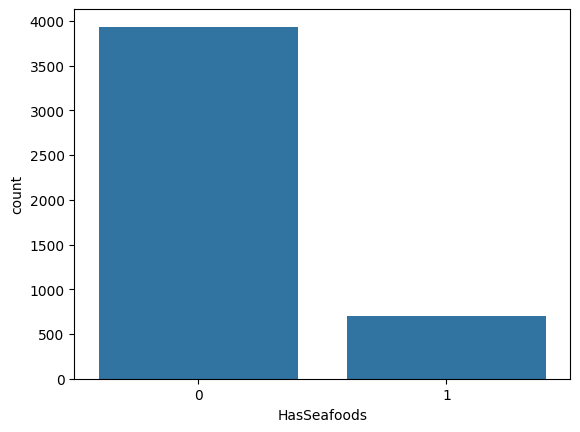

In [325]:
sns.countplot(x='HasSeafoods', data=df)

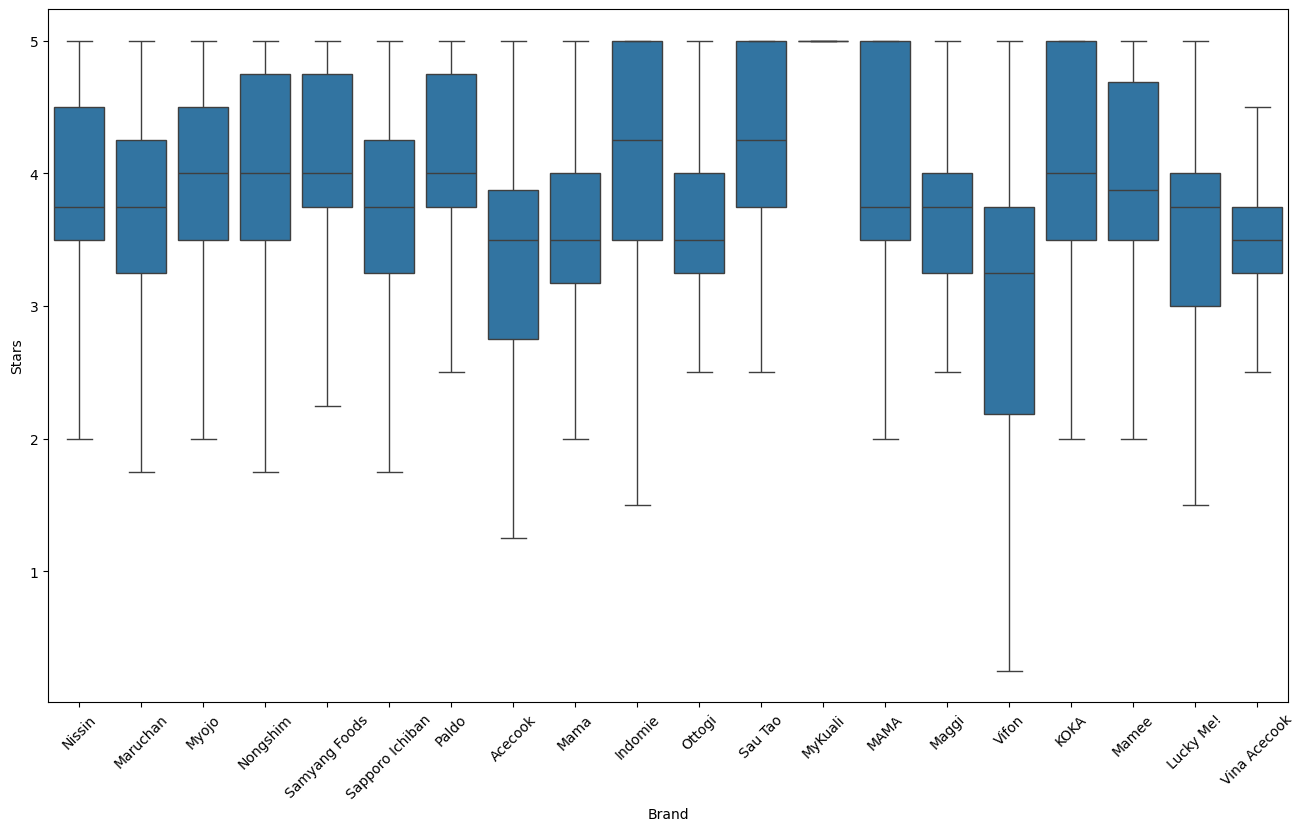

In [326]:
#find brand have the highest star
plt.figure(figsize=(16, 9))
sns.boxplot(x='Brand', y='Stars', data=df, order=brand_counts.index[:20], showfliers=False)
plt.xticks(rotation=45)
plt.show()

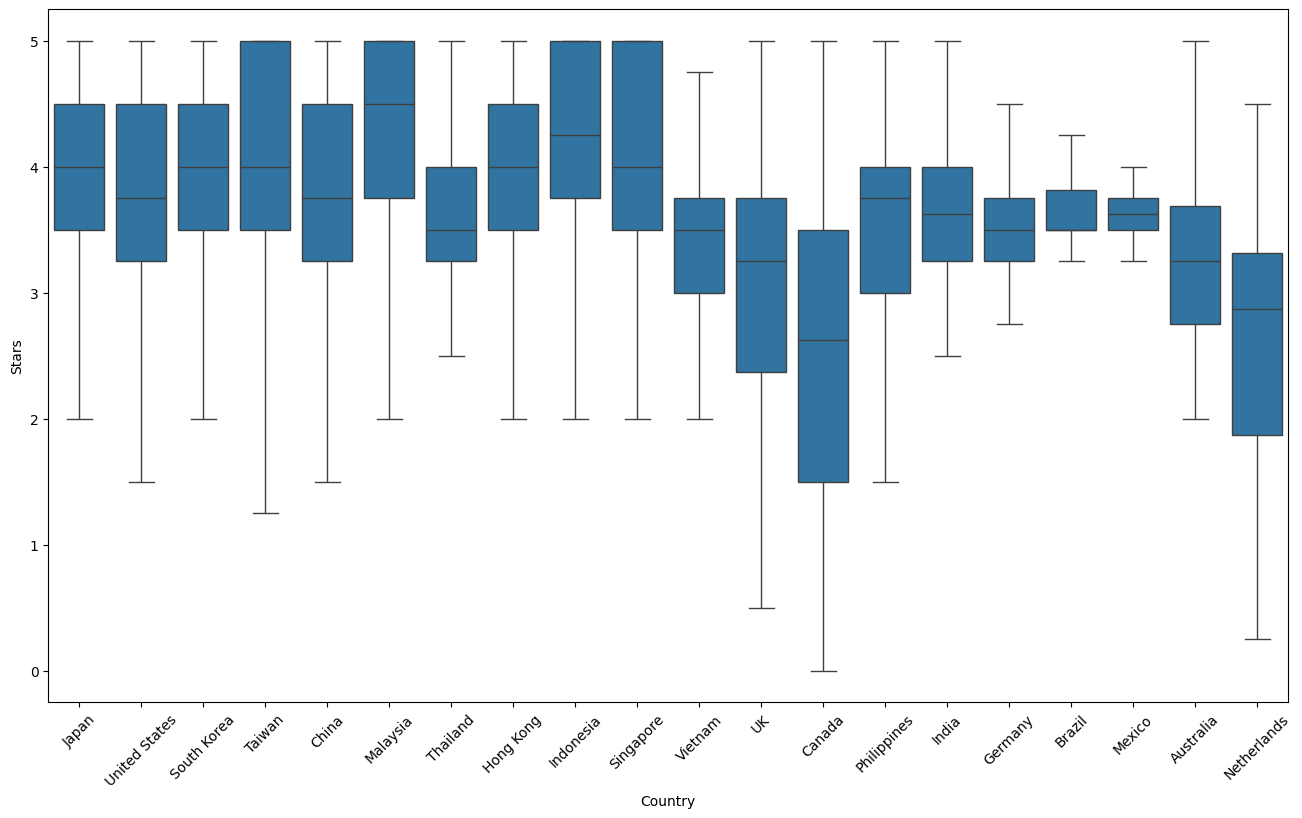

In [327]:
#find country have the highest star
plt.figure(figsize=(16, 9))
sns.boxplot(x='Country', y='Stars', data=df, order=country_count.index[:20], showfliers=False)
plt.xticks(rotation=45)
plt.show()

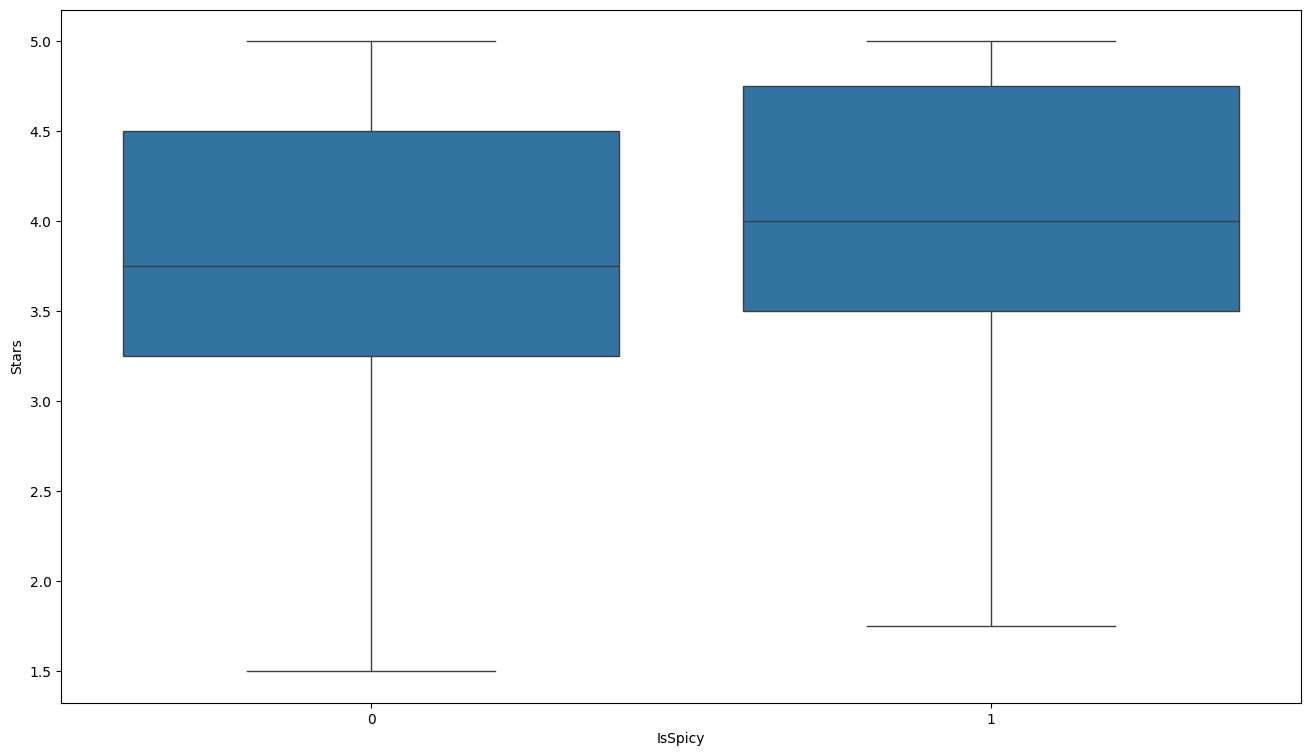

In [328]:
#find country have the highest star , spicy or no spicy
plt.figure(figsize=(16, 9))
sns.boxplot(x='IsSpicy', y='Stars', data=df, showfliers=False)
plt.show()

In [329]:
spicy_df = df[df['IsSpicy'] == 1]
nonspicy_df = df[df['IsSpicy'] == 0]
print(spicy_df['Stars'].mean())
print(nonspicy_df['Stars'].mean())

3.842585743106927
3.6915977742448334


In [330]:
print(spicy_df['Stars'].median())
print(nonspicy_df['Stars'].median())

4.0
3.75


(array([ 61.,  20.,  57.,  75., 107., 188., 339., 913., 505., 880.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

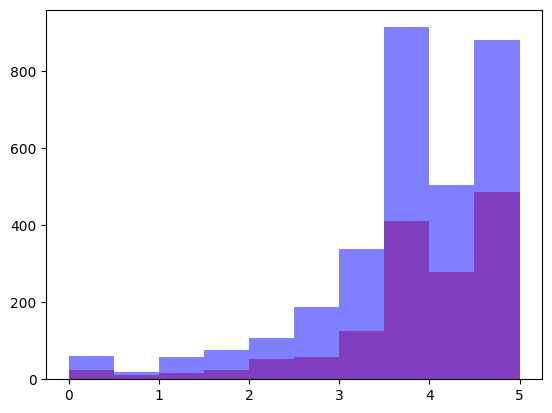

In [331]:
plt.hist(spicy_df['Stars'], alpha=0.5, color="red")
plt.hist(nonspicy_df['Stars'], alpha=0.5, color="blue")

Part III : Data Preparation

In [332]:
#phan tich cot brand
top_brand = df['Brand'].value_counts()[:20]
top_brand

Brand
Nissin             566
Maruchan           182
Myojo              152
Nongshim           136
Samyang Foods      121
Sapporo Ichiban    103
Paldo               97
Acecook             91
Mama                71
Indomie             68
Ottogi              59
Sau Tao             49
MyKuali             42
MAMA                41
Maggi               40
Vifon               40
KOKA                39
Mamee               38
Lucky Me!           35
Vina Acecook        34
Name: count, dtype: int64

In [333]:
#create new column with name TopBrand
new_brand = []

for brand in df['Brand']:
    if brand in top_brand:
        new_brand.append(brand)
    else: 
        new_brand.append("Other")

df['TopBrand'] = new_brand
df

,Brand,Variety,Style,Country,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,TopBrand
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN,1,0,0,0,Other
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN,0,0,0,0,Indomie
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN,0,0,0,0,MAMA
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN,0,0,0,0,Ottogi
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN,0,0,0,0,Samyang Foods
...,...,...,...,...,...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,0,0,0,Vifon
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,0,0,0,0,Other
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,1,0,0,1,Other
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,1,0,0,1,Other


In [334]:
len(df['TopBrand'].value_counts())

21

In [335]:
len(df['Brand'].value_counts())

695

In [336]:
#phan tich cot style
top_style = df['Style'].value_counts()[:4]

new_style = []

for style in df['Style']:
    if style in top_style:
        new_style.append(style)
    else: 
        new_style.append("Other")

df['TopStyle'] = new_style
df

,Brand,Variety,Style,Country,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,TopBrand,TopStyle
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN,1,0,0,0,Other,Pack
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN,0,0,0,0,Indomie,Pack
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN,0,0,0,0,MAMA,Pack
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN,0,0,0,0,Ottogi,Pack
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN,0,0,0,0,Samyang Foods,Pack
...,...,...,...,...,...,...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,0,0,0,Vifon,Bowl
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,0,0,0,0,Other,Pack
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,1,0,0,1,Other,Pack
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,1,0,0,1,Other,Pack


In [337]:
#phan tich cot Country
top_country = df['Country'].value_counts()[:11]

new_country = []

for country in df['Country']:
    if country in top_country:
        new_country.append(country)
    else: 
        new_country.append("Other")

df['TopCountry'] = new_country
df

,Brand,Variety,Style,Country,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,TopBrand,TopStyle,TopCountry
0,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5.0,NaN,1,0,0,0,Other,Pack,Malaysia
1,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5.0,NaN,0,0,0,0,Indomie,Pack,Indonesia
2,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN,0,0,0,0,MAMA,Pack,Thailand
3,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN,0,0,0,0,Ottogi,Pack,United States
4,Samyang Foods,Samyand Ramen,Pack,United States,5.0,NaN,0,0,0,0,Samyang Foods,Pack,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,0,0,0,0,Vifon,Bowl,Vietnam
4628,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,0,0,0,0,Other,Pack,Thailand
4629,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,1,0,0,1,Other,Pack,Thailand
4630,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,1,0,0,1,Other,Pack,Thailand


In [338]:
brand_dummy = pd.get_dummies(df['TopBrand'], prefix="from")
brand_dummy = brand_dummy.astype(int)
brand_dummy

,from_Acecook,from_Indomie,from_KOKA,from_Lucky Me!,from_MAMA,from_Maggi,from_Mama,from_Mamee,from_Maruchan,from_MyKuali,...,from_Nissin,from_Nongshim,from_Other,from_Ottogi,from_Paldo,from_Samyang Foods,from_Sapporo Ichiban,from_Sau Tao,from_Vifon,from_Vina Acecook
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4628,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4629,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4630,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [339]:
style_dummy = pd.get_dummies(df['TopStyle'], prefix="With")
style_dummy = style_dummy.astype(int)
style_dummy

,With_Bowl,With_Cup,With_Other,With_Pack,With_Tray
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
4627,1,0,0,0,0
4628,0,0,0,1,0
4629,0,0,0,1,0
4630,0,0,0,1,0


In [340]:
country_dummy = pd.get_dummies(df['TopCountry'], prefix="In")
country_dummy = country_dummy.astype(int)
country_dummy

,In_China,In_Hong Kong,In_Indonesia,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4627,0,0,0,0,0,0,0,0,0,0,0,1
4628,0,0,0,0,0,0,0,0,0,1,0,0
4629,0,0,0,0,0,0,0,0,0,1,0,0
4630,0,0,0,0,0,0,0,0,0,1,0,0


In [341]:
df_temp = df.drop(['Brand', 'Variety', 'Style', 'Country', 'TopBrand', 'TopStyle', 'TopCountry'], axis=1)
df_temp

,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods
0,5.0,NaN,1,0,0,0
1,5.0,NaN,0,0,0,0
2,4.5,NaN,0,0,0,0
3,4.5,NaN,0,0,0,0
4,5.0,NaN,0,0,0,0
...,...,...,...,...,...,...
4627,3.5,NaN,0,0,0,0
4628,1.0,NaN,0,0,0,0
4629,2.0,NaN,1,0,0,1
4630,2.0,NaN,1,0,0,1


In [342]:
df_final = pd.concat([df_temp, style_dummy,brand_dummy, country_dummy ], axis=1)
df_final

,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Bowl,With_Cup,With_Other,With_Pack,...,In_Indonesia,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam
0,5.0,NaN,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5.0,NaN,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4628,1.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4629,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4630,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [343]:
df_final.to_csv('ramen_rating_2023_final.csv', index=None)

In [344]:
pd.read_csv('ramen_rating_2023_final.csv')

,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Bowl,With_Cup,With_Other,With_Pack,...,In_Indonesia,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam
0,5.0,NaN,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5.0,NaN,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4628,1.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4629,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4630,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
